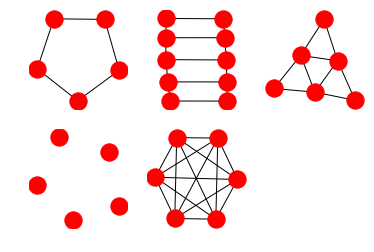

In [176]:
import matplotlib.pyplot as plt

# 实践一
G = nx.cycle_graph(5)
subax1 = plt.subplot(231)
nx.draw(G)   # default spring_layout
G=nx.ladder_graph(5)
subax2 = plt.subplot(232)
nx.draw(G)
G=nx.dorogovtsev_goltsev_mendes_graph(2)
subax3 = plt.subplot(233)
nx.draw(G)
G=nx.empty_graph(5)
subax4 = plt.subplot(234)
nx.draw(G)
G=nx.complete_graph(6)
subax5 = plt.subplot(235)
nx.draw(G)

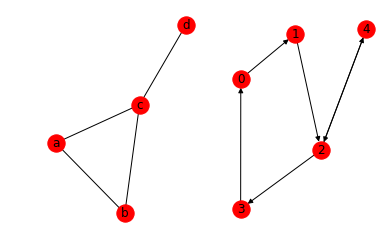

In [177]:
# 实践二
# 展示例图（左图G为无向图，右图G2为有向图。）
import networkx as nx
G = nx.Graph()
e = [('a', 'b', 0.3), ('b', 'c', 0.9), ('a', 'c', 0.5), ('c', 'd', 1.2)]
G.add_weighted_edges_from(e)
subax_a=plt.subplot(121)
nx.draw(G, with_labels=True)

G2= nx.DiGraph([(0, 1), (1, 2), (2, 3), (3, 0),(4, 2), (2, 4) ])
subax_b=plt.subplot(122)
nx.draw(G2, with_labels=True)

In [178]:
# 判断图是否为二部图
from networkx.algorithms import bipartite
print(bipartite.is_bipartite(G))
print(bipartite.is_bipartite(G2))

False
True


In [179]:
# 寻找图中的桥
print(list(nx.bridges(G)))

[('c', 'd')]


In [180]:
# 寻找最大团，以及每个顶点所在的最大团数。
from networkx.algorithms.approximation import clique
print(clique.max_clique(G))
print(nx.number_of_cliques(G))

{'a', 'c', 'b'}
{'a': 1, 'b': 1, 'c': 2, 'd': 1}


In [181]:
# 寻找一种点着色方案
d = nx.coloring.greedy_color(G, strategy="largest_first")
print(d)

{'c': 0, 'a': 1, 'b': 2, 'd': 1}


In [182]:
# 判断图是否强连通
print(nx.is_strongly_connected(G2))
G2.remove_edge(2, 3)
print(nx.is_strongly_connected(G2))
G2.add_edge(2,3)

True
False


In [183]:
# 判断图是否k-边连通
print(nx.is_k_edge_connected(G, k=1))
print(nx.is_k_edge_connected(G, k=2))

True
False


In [184]:
# 寻找图的圈
print(list(nx.find_cycle(G)))

[('a', 'b'), ('b', 'c'), ('c', 'a')]


In [185]:
# 寻找图的一个支配集
print(list(nx.dominating_set(G, start_with=None)))

['d', 'a']


In [186]:
# 判断图是否为欧拉图
print(nx.is_eulerian(G))
G.remove_edge('c','b')
G.add_edge('b','d')
print(nx.is_eulerian(G))
G.remove_edge('b','d')
G.add_edge('c','b')

False
True


In [187]:
# 寻找图的一组最大匹配
print(sorted(nx.maximal_matching(G)))

[('a', 'b'), ('c', 'd')]


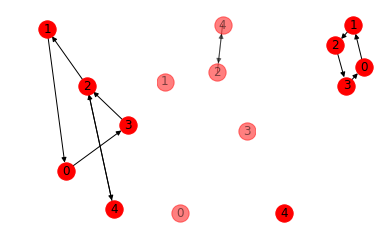

In [199]:
# 图的基本变换，包括反向、求交、求差等
G2_reversed = nx.reverse(G2)
subax_1=plt.subplot(131)
nx.draw(G2_reversed, with_labels=True)
R = nx.intersection(G2, G2_reversed)
subax_2=plt.subplot(132)
nx.draw(R,with_labels=True,alpha=0.5)
R2=nx.difference(G2, G2_reversed)
subax_2=plt.subplot(133)
nx.draw(R2,with_labels=True)

In [200]:
# 寻找边权和最小生成树
T = nx.minimum_spanning_tree(G)
print(sorted(T.edges(data=True)))

[('a', 'b', {'weight': 0.3}), ('a', 'c', {'weight': 0.5}), ('c', 'd', {'weight': 1.2})]


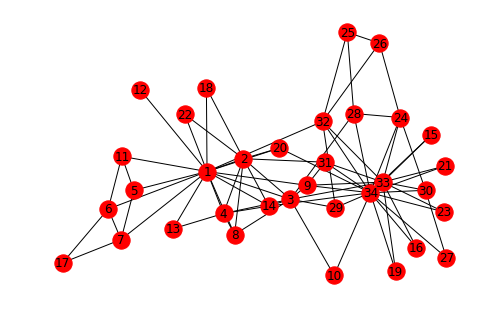

俱乐部成员数： 34
成员间关系数： 78
平均每个成员有 4.588235294117647 个关系
关系最重要的前五名，以及他们的关系数：
第 1 名: 34 ，关系数： 17
第 2 名: 1 ，关系数： 16
第 3 名: 33 ，关系数： 12
第 4 名: 3 ，关系数： 10
第 5 名: 2 ，关系数： 9
下面是成员关系重要程度的可视化结果：


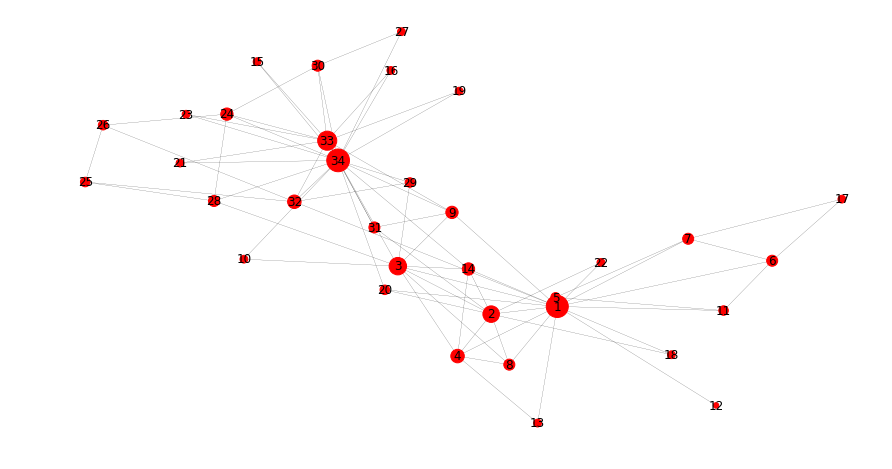

该网络中集群数有 3 个，下面是集群的可视化结果：


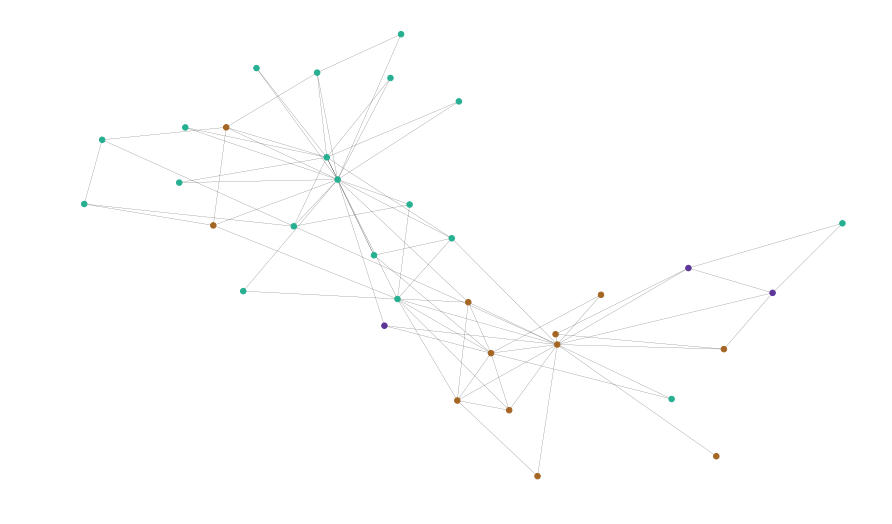

In [241]:
# 实践三
# 以空手道俱乐部图为例进行分析
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

ori_data=(
2,1,
3,1,
3,2,
4,1,
4,2,
4,3,
5,1,
6,1,
7,1,
7,5,
7,6,
8,1,
8,2,
8,3,
8,4,
9,1,
9,3,
10,3,
11,1,
11,5,
11,6,
12,1,
13,1,
13,4,
14,1,
14,2,
14,3,
14,4,
17,6,
17,7,
18,1,
18,2,
20,1,
20,2,
22,1,
22,2,
26,24,
26,25,
28,3,
28,24,
28,25,
29,3,
30,24,
30,27,
31,2,
31,9,
32,1,
32,25,
32,26,
32,29,
33,3,
33,9,
33,15,
33,16,
33,19,
33,21,
33,23,
33,24,
33,30,
33,31,
33,32,
34,9,
34,10,
34,14,
34,15,
34,16,
34,19,
34,20,
34,21,
34,23,
34,24,
34,27,
34,28,
34,29,
34,30,
34,31,
34,32,
34,33
)
G=nx.Graph()
for i in range(0,len(ori_data),2):
    G.add_edge(ori_data[i],ori_data[i+1])
nx.draw(G,with_labels=True)  # 绘制图形
plt.show()
print("俱乐部成员数：",G.number_of_nodes())
print("成员间关系数：",G.number_of_edges())
print("平均每个成员有",np.mean([d for _, d in G.degree()]),"个关系")

degree_centrality = nx.centrality.degree_centrality(
    G
)  # save results in a variable to use again

l0=(sorted(G.degree, key=lambda item: item[1], reverse=True))[:8]
print("关系最重要的前五名，以及他们的关系数：",)
for i in range(5):
    print("第",i+1,"名:",l0[i][0],"，关系数：",(l0[i][1]))

# 可视化成员重要程度
print("下面是成员关系重要程度的可视化结果：")
pos = nx.spring_layout(G, iterations=15)
node_size = [
    v * 1000 for v in degree_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=True, width=0.15)
_=plt.axis("off")
plt.show()

# 集群分析
colors = ["" for x in range(G.number_of_nodes())]  # initialize colors list
counter = 0
for com in nx.community.label_propagation_communities(G):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in list(
        com
    ):  # fill colors list with the particular color for the community nodes
        colors[node-1] = color
print("该网络中集群数有",counter,"个，下面是集群的可视化结果：")
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G, pos=pos, node_size=30, with_labels=False, width=0.15, node_color=colors
)